<h1>Gold price prediction</h1>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Read the data</h1>

df=pd.read_csv('gold_monthly_csv.csv')

In [69]:
df.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


<h1>Perform Exploratory Data Analysis</h1>

In [226]:
date=pd.date_range(start = '1/1/1950', end = '8/1/2020', freq='ME')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [73]:
df['month']=date
df.drop('Date', axis=1, inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [83]:
df.head(10)

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73
1950-06-30,34.73
1950-07-31,34.73
1950-08-31,34.73
1950-09-30,34.73


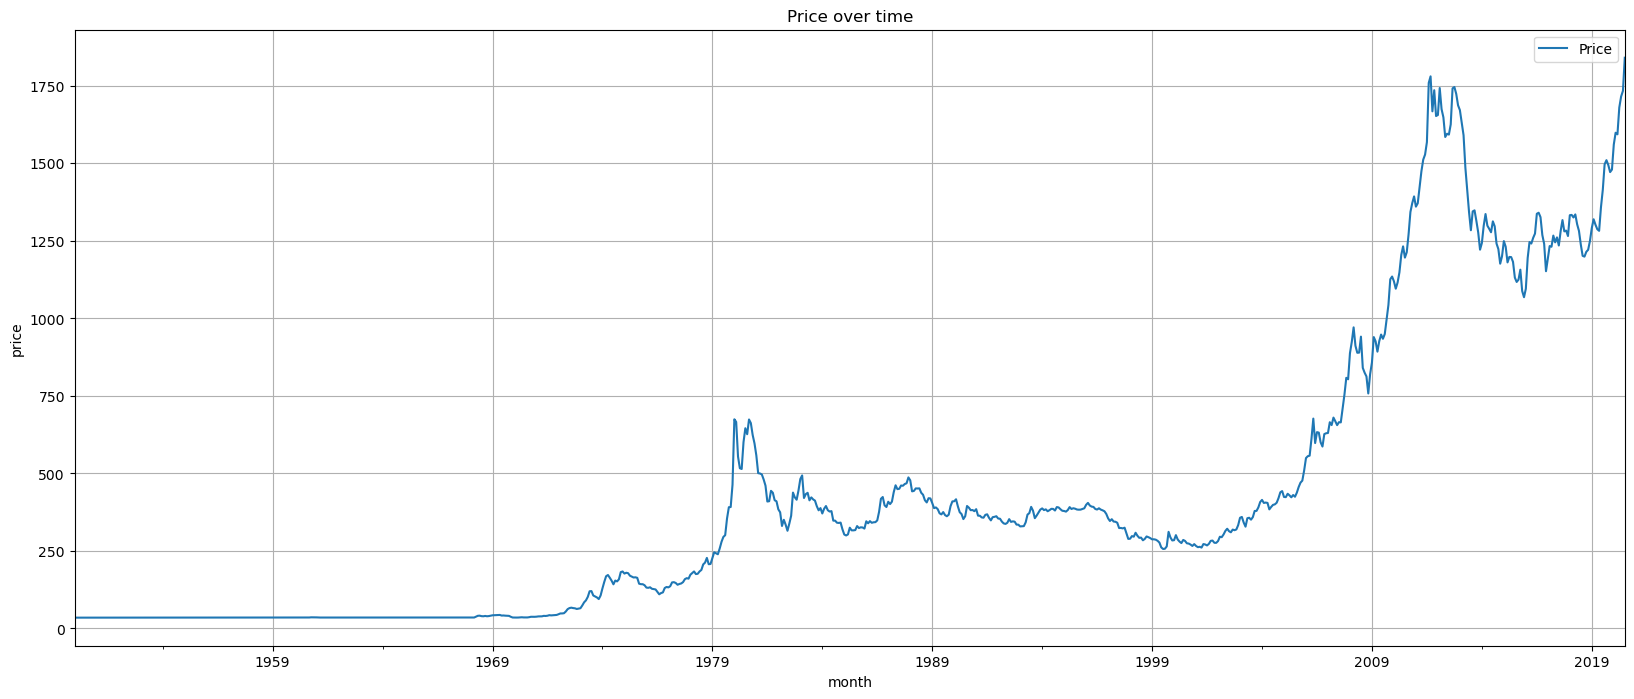

In [97]:
#plot the data
# plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
# plt.plot(df['month'], df['Price'], label='yearly price')
plt.xlabel('month')
plt.ylabel('price')
# plt.legend()
plt.title('Price over time')
# plt.show()
plt.grid()

In [99]:
df.shape

(847, 1)

In [101]:
 df.isnull().sum()

Price    0
dtype: int64

In [103]:
round(df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


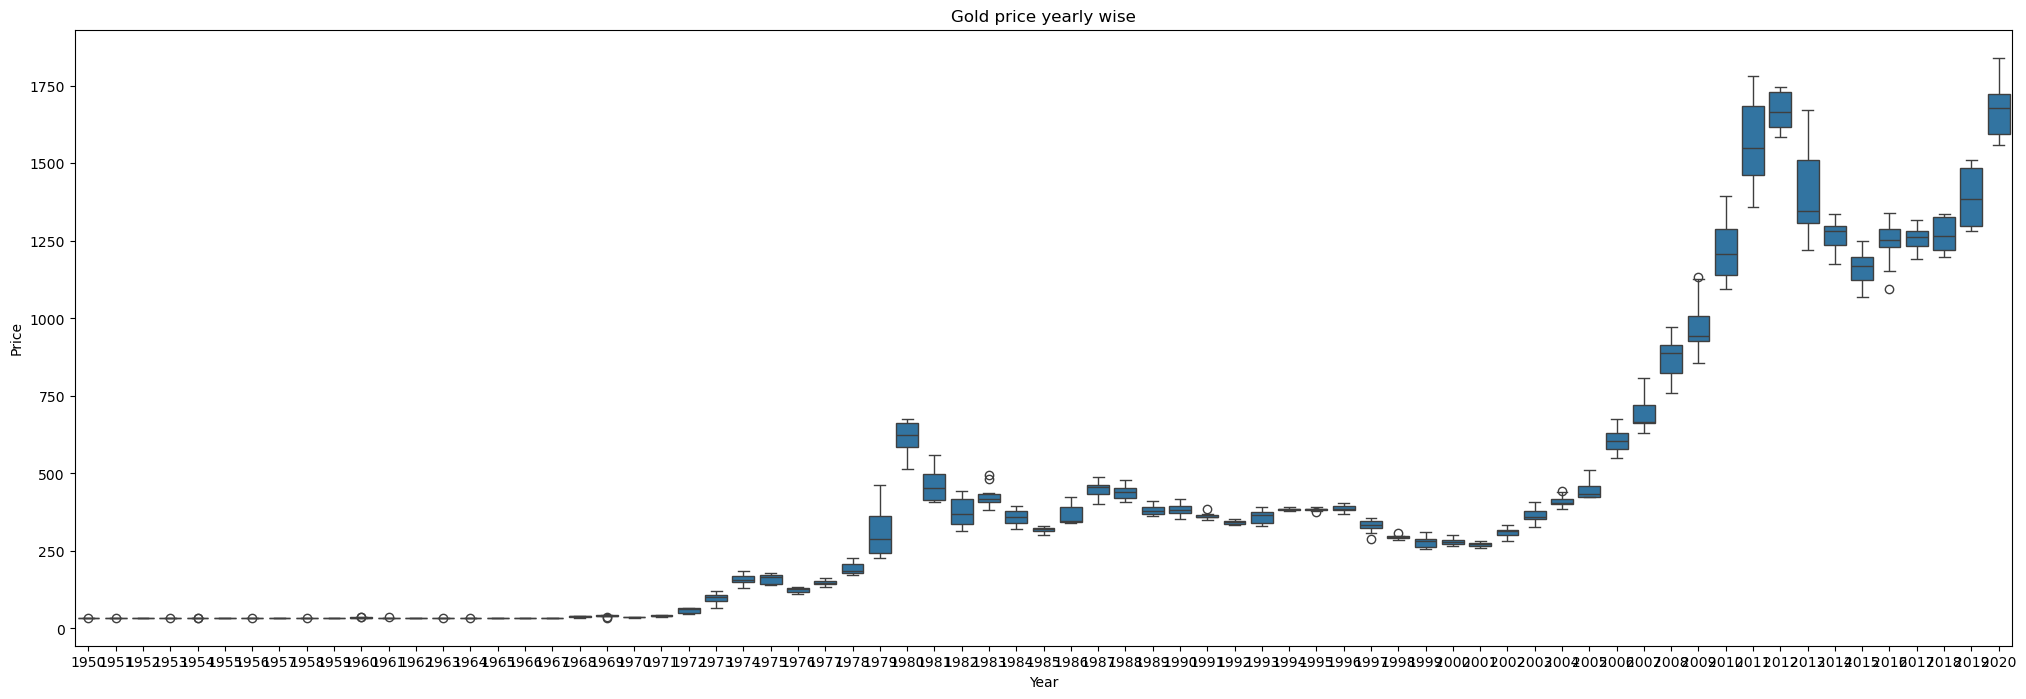

In [105]:
fig, ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:,0], ax=ax)
plt.title('Gold price yearly wise')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

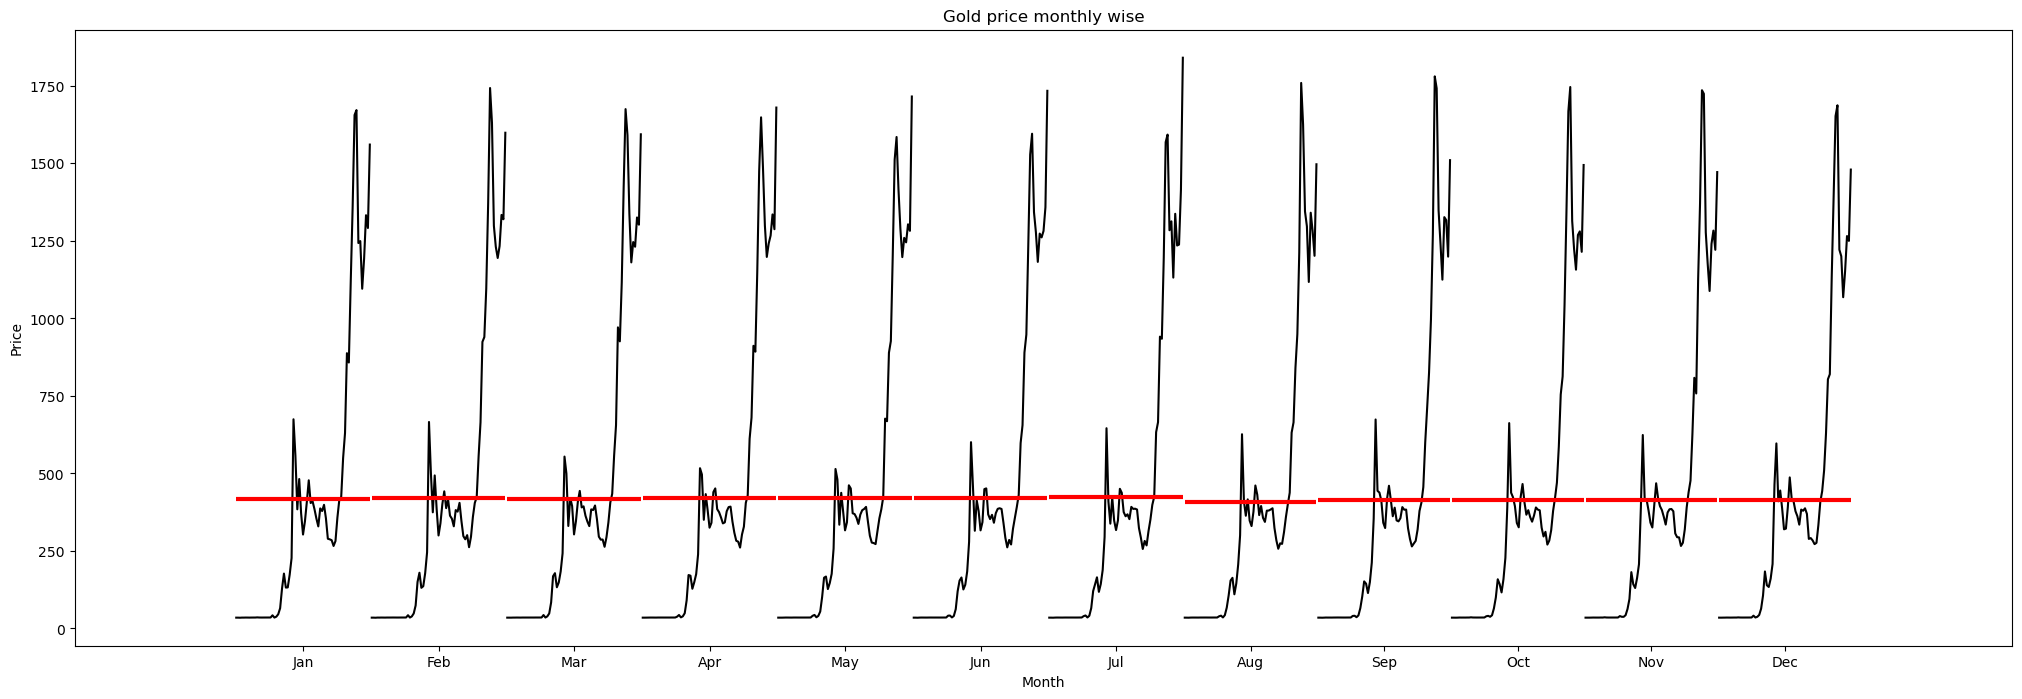

In [113]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax=plt.subplots(figsize=(25,8))
month_plot(df,ylabel='Gold Price', ax=ax)
plt.title('Gold price monthly wise')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()
# plt.grid()


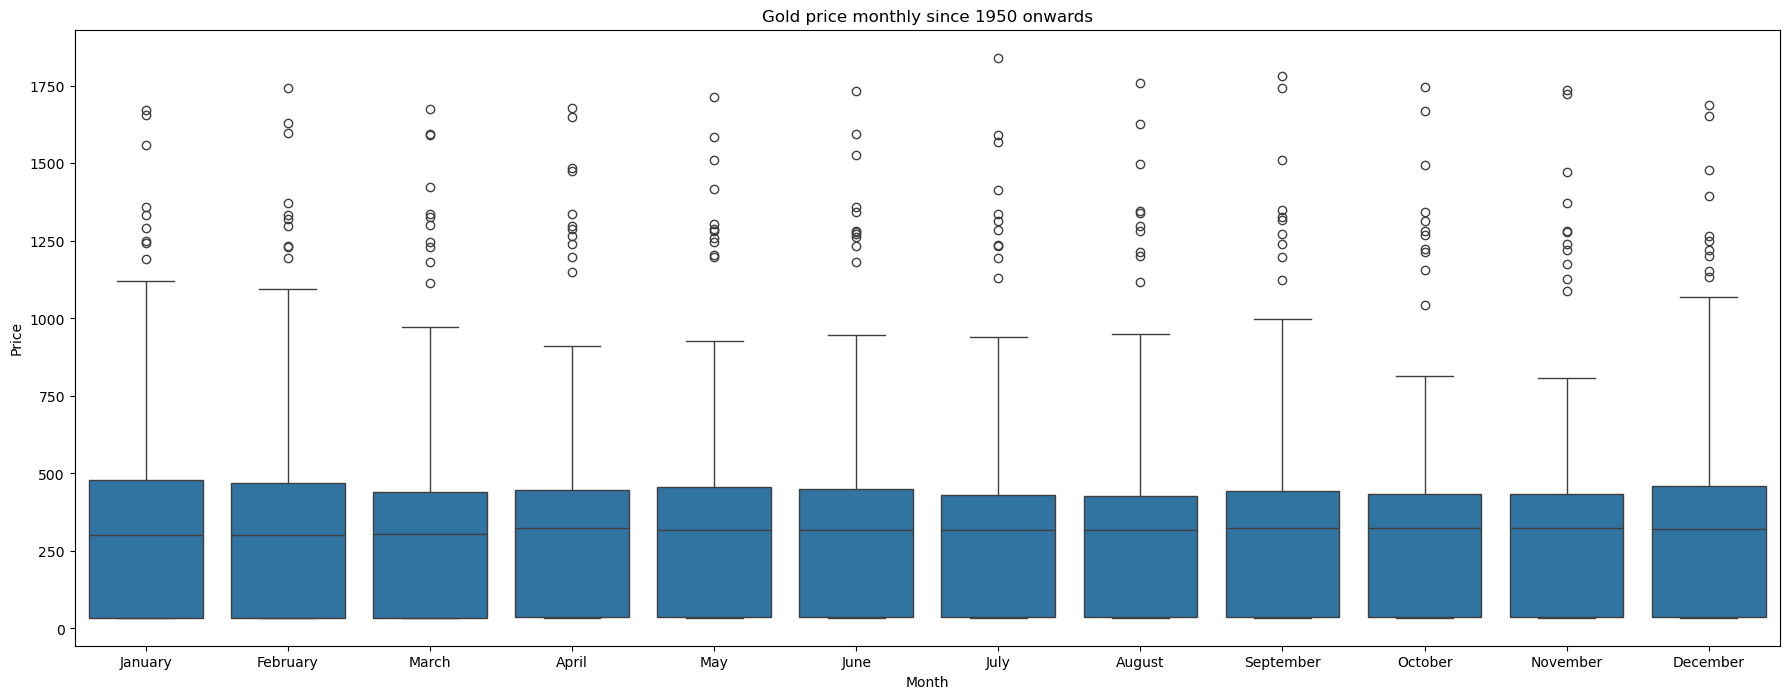

In [119]:
fig, ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold price monthly since 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
# plt.legend()
plt.show()

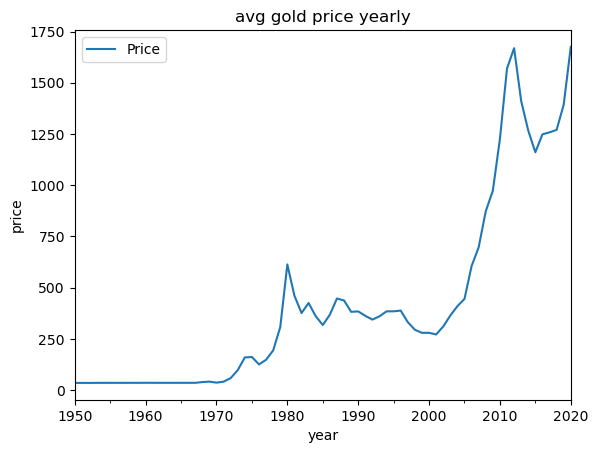

In [129]:
df_yearly_sum=df.resample('YE').mean()
df_yearly_sum.plot()
plt.title('avg gold price yearly')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

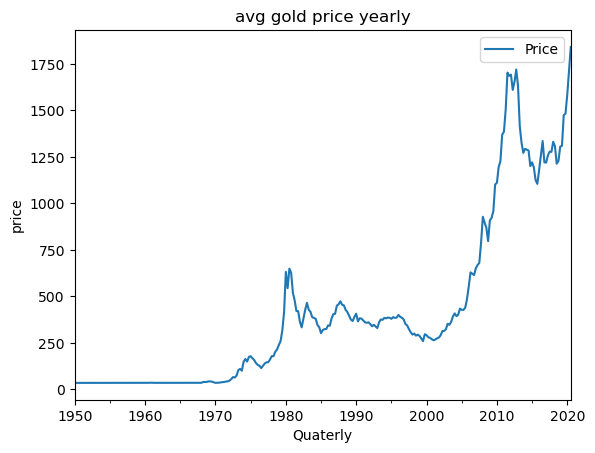

In [135]:
df_yearly_sum=df.resample('QE').mean()
df_yearly_sum.plot()
plt.title('avg gold price yearly')
plt.xlabel('Quaterly')
plt.ylabel('price')
plt.show()

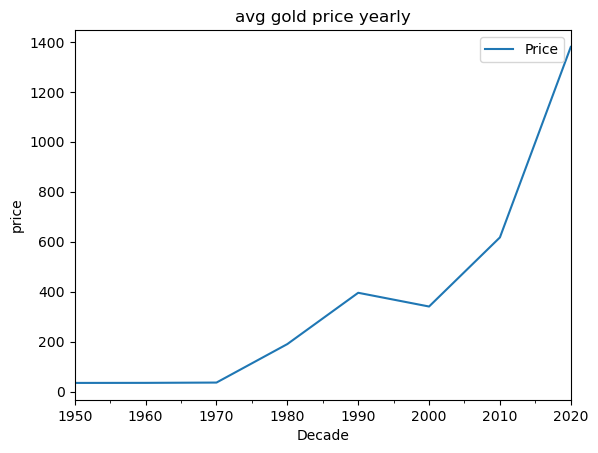

In [147]:
df_yearly_sum=df.resample('10YE').mean()
df_yearly_sum.plot()
plt.title('avg gold price yearly')
plt.xlabel('Decade')
plt.ylabel('price')
plt.show()

In [149]:
df_final=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_final=df_final.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_final['Cov_pct']=((df_final['Std']/df_final['Mean'])*100).round(2)
df_final.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


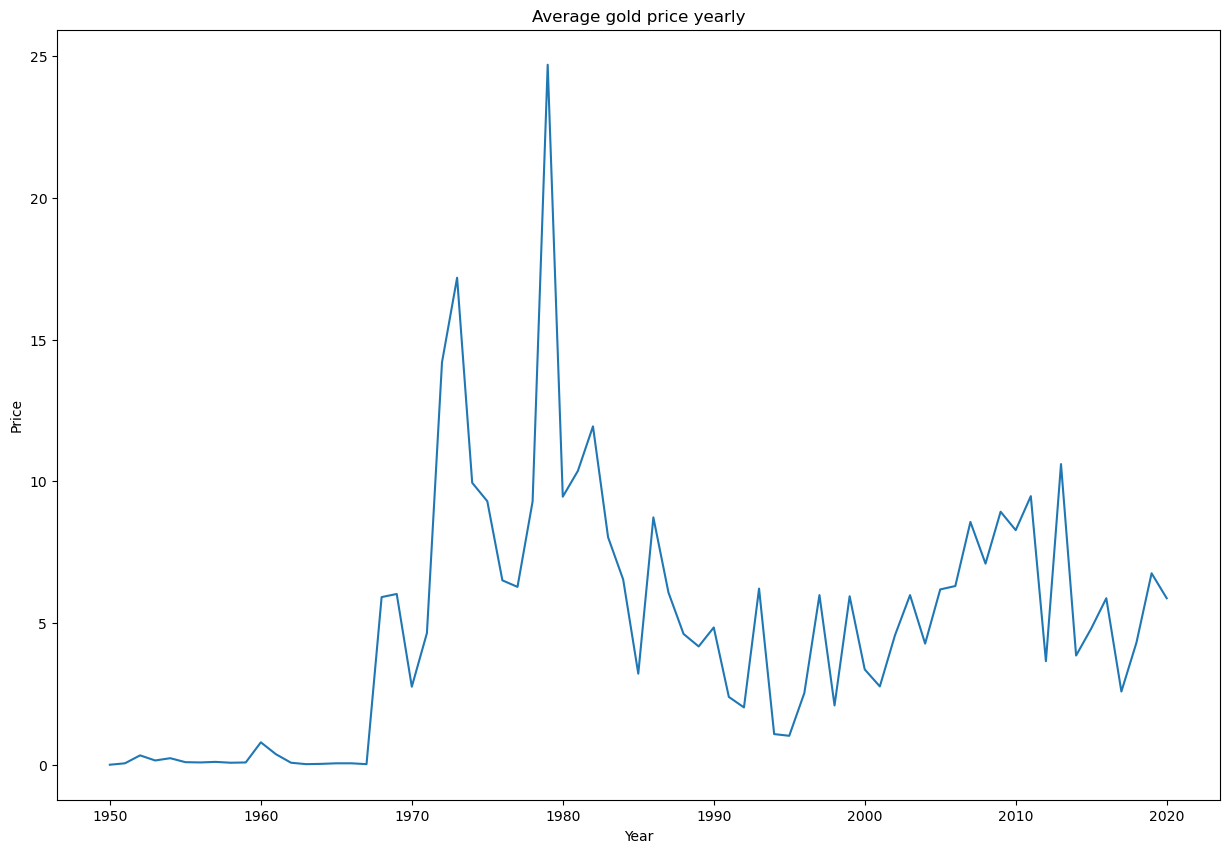

In [151]:
fig , ax=plt.subplots(figsize=(15,10))
df_final['Cov_pct'].plot()
plt.title('Average gold price yearly')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

<h1>Model Implementation</h1>

In [153]:
train=df[df.index.year<=2015]
test=df[df.index.year>2015]

In [155]:
train

,Price
month,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2015-08-31,1117.525
2015-09-30,1124.905
2015-10-31,1157.123


In [165]:
train.shape

(792, 1)

In [167]:
test.shape

(55, 1)

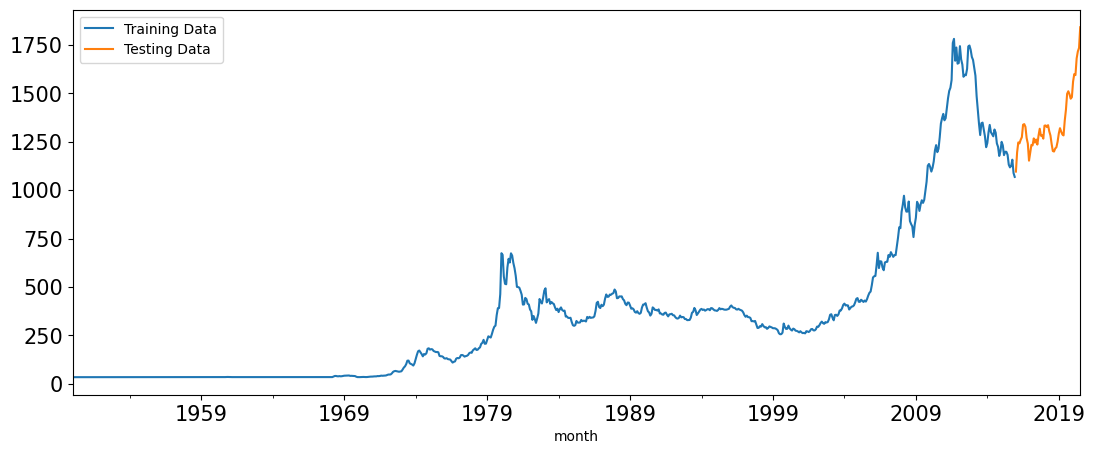

In [171]:
train['Price'].plot(figsize=(13,5), fontsize=15)
test['Price'].plot(figsize=(13,5), fontsize=15)
plt.legend(['Training Data', 'Testing Data'])
plt.show()

In [176]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [178]:
lr_train=train.copy()
lr_test=test.copy()

In [182]:
lr_train['time']=train_time
lr_test['time']=test_time

In [188]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(lr_train[['time']], lr_train['Price'].values)

LinearRegression()

In [190]:
test_predict=model.predict(lr_test[['time']])

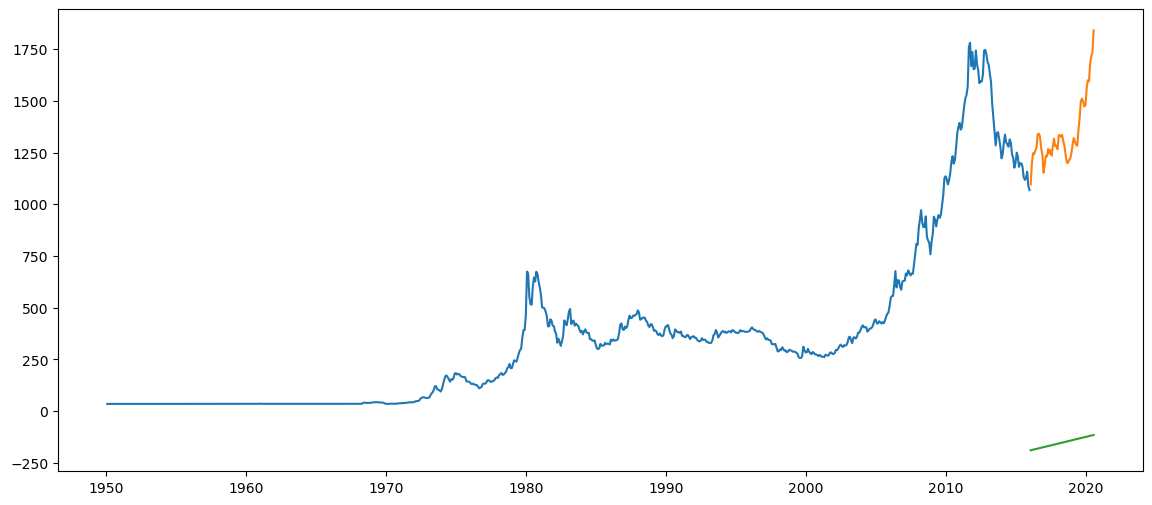

In [192]:
lr_test['forecast']=test_predict

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label='train')
plt.plot(test['Price'], label='test')
plt.plot(lr_test['forecast'], label='regression')
plt.show()

In [216]:
from sklearn.metrics import r2_score, mean_squared_error
# R² Score
r2 = r2_score(lr_test['time'], lr_test['forecast'])

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(lr_test['time'], lr_test['forecast']))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: -128.2975
RMSE: 180.5075
